In [1]:
import  pandas as pd
import numpy as np
import seaborn as sns
import scipy as sp
import matplotlib.pyplot as plt

In [4]:
#Reading the file
data = pd.read_csv('Week8.csv')
data.head()

,Gender,Test preparation,Total Marks
0,male,none,14
1,female,none,28
2,female,none,18
3,female,none,48
4,female,none,21


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Gender            28 non-null     object
 1   Test preparation  28 non-null     object
 2   Total Marks       28 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 800.0+ bytes


In [6]:
data.shape

(28, 3)

In [7]:
#checking the value null or not
data.isna().sum()

Gender              0
Test preparation    0
Total Marks         0
dtype: int64

In [8]:
#1. Carry out descriptive analytics on the dataset.
data.describe()

,Total Marks
count,28.000000
mean,32.321429
std,12.454520
min,12.000000
25%,22.500000
50%,33.000000
75%,43.250000
max,50.000000


In [9]:
data['Gender'].value_counts()

female    16
male      12
Name: Gender, dtype: int64

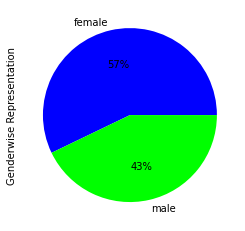

In [10]:
# Digramatic repersentation
data['Gender'].value_counts().plot.pie(label=('Genderwise Representation'),colormap='brg', autopct='%1.0f%%') 
plt.show()

In [11]:
#From the above plot we find that we have more female students than male(57%)

In [13]:
Minimum_scores = data.groupby(['Gender','Test preparation']).min()
Minimum_scores


Total Marks
Gender Test preparation             
female completed                  40
       none                       12
male   completed                  43
       none                       14

In [14]:
Maximum_scores = data.groupby(['Gender','Test preparation']).max()
Maximum_scores


Total Marks
Gender Test preparation             
female completed                  50
       none                       48
male   completed                  44
       none                       47

In [15]:
Average_scores = data.groupby(['Gender','Test preparation']).median()
Average_scores

Total Marks
Gender Test preparation             
female completed                45.5
       none                     27.5
male   completed                44.0
       none                     24.0

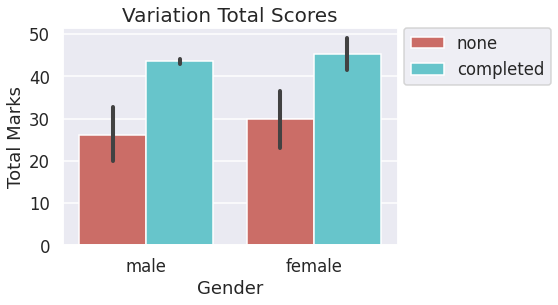

In [16]:
# Bar plot showing variation in scores based on Gender
sns.set_context('talk')
sns.set_style('darkgrid')
sns.barplot(y='Total Marks',x='Gender',hue='Test preparation',palette = 'hls',data=data);
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);
plt.title('Variation Total Scores',fontsize=20);

In [17]:
# 2. Check whether female and male students scored the same marks.
#Framing Hypothesis:
#Null hypothesis- H0: Average mark of female equal to average mark of male
#Alt hypothesis- H1: Average mark of female not equal to average mark of male

In [18]:
a_mask = data['Gender']=='male'
a_mask

0      True
1     False
2     False
3     False
4     False
5     False
6      True
7     False
8      True
9      True
10     True
11     True
12     True
13     True
14    False
15    False
16    False
17    False
18     True
19     True
20     True
21     True
22    False
23    False
24    False
25    False
26    False
27    False
Name: Gender, dtype: bool

In [23]:
male_data=data[a_mask]
male_data

,Gender,Test preparation,Total Marks
0,male,none,14
6,male,none,30
8,male,none,18
9,male,none,24
10,male,completed,44
11,male,none,23
12,male,completed,43
13,male,none,28
18,male,none,47
19,male,none,36


In [20]:
b_mask = data['Gender']=='female'
female_data = data[b_mask]
female_data

,Gender,Test preparation,Total Marks
1,female,none,28
2,female,none,18
3,female,none,48
4,female,none,21
5,female,completed,40
7,female,none,12
14,female,none,41
15,female,none,13
16,female,completed,48
17,female,none,45


In [25]:
# T Test
import scipy.stats as stats
stats.ttest_ind(male_data['Total Marks'],female_data['Total Marks'])

Ttest_indResult(statistic=-0.6940885268848668, pvalue=0.4937822317960763)

In [26]:
print(np.var(male_data), np.var(female_data))

Total Marks    135.743056
dtype: float64 Total Marks    155.1875
dtype: float64


In [27]:
ratio_check = np.var(male_data)/np.var(female_data)

print(ratio_check)

Total Marks    0.874704
dtype: float64


In [28]:
print(stats.ttest_ind(a=male_data['Total Marks'], b= female_data['Total Marks'], equal_var=True))

Ttest_indResult(statistic=-0.6940885268848668, pvalue=0.4937822317960763)


In [56]:
#Whether test preparation helps the students?
# Hypothesis
# Reject H0: Test Preparation had helped students
# Reject H1:Test Preparation does not helped students

test_complted=data[data['Test preparation']=='completed']
test_notcomplted=data[data['Test preparation']=='none']


In [57]:
test_complted

,Gender,Test preparation,Total Marks
5,female,completed,40
10,male,completed,44
12,male,completed,43
16,female,completed,48
21,male,completed,44
26,female,completed,50
27,female,completed,43


In [58]:

test_complted=test_complted.drop(['Test preparation','Gender'],axis=1)
test_notcomplted=test_notcomplted.drop(['Test preparation','Gender'],axis=1)

In [59]:
# T Test
tvalue, pvalue = stats.ttest_ind(test_complted,test_notcomplted)


In [60]:
stats.ttest_ind(test_complted,test_notcomplted)
tcriteria=stats.t.ppf((1-0.05), 26)
stats.t.ppf((1-0.05), 26)

1.7056179197592727

In [61]:
# Checking the test helped or not
#Testing condition check
if (tvalue>tcriteria and pvalue <0.05):
    print('Reject H0: Test Preparation help students')
else:
    print('Reject H1:Test Preparation does not help students')

Reject H0: Test Preparation help students
